In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
!pip install scikeras

In [48]:
data=pd.read_csv("/content/kidney_disease.csv")
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [49]:
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [50]:
data.columns=['id','age', 'blood_pressure', 'specific_gravity', 'albumin',
              'sugar','red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
              'blood glucose random', 'blood_urea', 'serum_creatinine', 'sodium','potassium',
              ' hemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetesmellitus', 'coronary_artery_disease','appetite',
              'pedal_edema', 'anemia', 'class']
data.columns

Index(['id', 'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood glucose random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', ' hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetesmellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood glucose random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [52]:
data.isnull().any()

,0
id,False
age,True
blood_pressure,True
specific_gravity,True
albumin,True
sugar,True
red_blood_cells,True
pus_cell,True
pus_cell_clumps,True
bacteria,True


In [53]:
data['packed_cell_volume'] = pd.to_numeric(data['packed_cell_volume'], errors='coerce')
data['white_blood_cell_count'] = pd.to_numeric(data['white_blood_cell_count'], errors='coerce')
data['red_blood_cell_count'] = pd.to_numeric(data['red_blood_cell_count'], errors='coerce')

data['blood glucose random'] = data['blood glucose random'].fillna(data['blood glucose random'].mean())
data['blood_pressure'] = data['blood_pressure'].fillna(data['blood_pressure'].mean())
data['blood_urea'] = data['blood_urea'].fillna(data['blood_urea'].mean())
data[' hemoglobin'] = data[' hemoglobin'].fillna(data[' hemoglobin'].mean())
data['packed_cell_volume'] = data['packed_cell_volume'].fillna(data['packed_cell_volume'].mean())
data['potassium'] = data['potassium'].fillna(data['potassium'].mean())
data['red_blood_cell_count'] = data['red_blood_cell_count'].fillna (data['red_blood_cell_count'].mean())
data['serum_creatinine'] = data['serum_creatinine'].fillna (data['serum_creatinine'].mean())
data['sodium'] = data['sodium'].fillna(data['sodium'].mean())
data['white_blood_cell_count'] = data['white_blood_cell_count'].fillna(data['white_blood_cell_count'].mean())
data['age'] = data['age'].fillna(data['age'].mode()[0])
data['hypertension'] = data['hypertension'].fillna (data['hypertension'].mode() [0])
data['pus_cell_clumps'] = data['pus_cell_clumps'].fillna(data['pus_cell_clumps'].mode()[0])
data['appetite'] = data['appetite'].fillna(data['appetite'].mode() [0])
data['albumin'] = data['albumin'].fillna(data['albumin'].mode() [0])
data['pus_cell'] = data['pus_cell'].fillna(data['pus_cell'].mode()[0])
data['red_blood_cells'] = data['red_blood_cells'].fillna(data['red_blood_cells'].mode() [0])
data['coronary_artery_disease'] = data['coronary_artery_disease'].fillna(data['coronary_artery_disease'].mode() [0])
data['bacteria'] = data['bacteria'].fillna(data['bacteria'].mode() [0])
data['anemia'] = data['anemia'].fillna(data['anemia'].mode() [0])
data['sugar'] = data['sugar'].fillna (data['sugar'].mode() [0])
data['diabetesmellitus'] = data['diabetesmellitus'].fillna (data['diabetesmellitus'].mode() [0])
data['pedal_edema'] = data['pedal_edema'].fillna(data['pedal_edema'].mode()[0])
data[ 'specific_gravity'] = data[ 'specific_gravity'].fillna (data[ 'specific_gravity'].mode() [0])

In [54]:
catcols = set(data.dtypes[data.dtypes == 'O'].index.values)
print(catcols)

{'coronary_artery_disease', 'pus_cell', 'red_blood_cells', 'appetite', 'anemia', 'hypertension', 'class', 'bacteria', 'diabetesmellitus', 'pus_cell_clumps', 'pedal_edema'}


In [55]:
from collections import Counter as c

for i in catcols:
  print(f"Column: {i}")
  print(c(data[i]))
  print("*"*120 + "\n")

Column: coronary_artery_disease
Counter({'no': 364, 'yes': 34, '\tno': 2})
************************************************************************************************************************

Column: pus_cell
Counter({'normal': 324, 'abnormal': 76})
************************************************************************************************************************

Column: red_blood_cells
Counter({'normal': 353, 'abnormal': 47})
************************************************************************************************************************

Column: appetite
Counter({'good': 318, 'poor': 82})
************************************************************************************************************************

Column: anemia
Counter({'no': 340, 'yes': 60})
************************************************************************************************************************

Column: hypertension
Counter({'no': 253, 'yes': 147})
***************************************

In [56]:
catcols=['bacteria', 'anemia', 'hypertension', 'coronary_artery_disease', 'class', 'appetite', 'pus_cell_clumps', 'pus_cell', 'diabetesmellitus', 'red_blood_cells', 'pedal_edema']

In [57]:
from sklearn.preprocessing import LabelEncoder #imorting the LabelEncoding from sklearn
for i in catcols: #Looping through all the categorical columns
  print("LABEL ENCODING OF:",i)
  LEi = LabelEncoder() # creating an object of LabelEncoder
  print(c(data[i])) #getting the classes values before transformation
  data[i]= LEi.fit_transform(data[i])# trannsforming our text classes to numerical values
  print(c(data[i])) #getting the classes values after transformation
  print("*"*100)

LABEL ENCODING OF: bacteria
Counter({'notpresent': 378, 'present': 22})
Counter({0: 378, 1: 22})
****************************************************************************************************
LABEL ENCODING OF: anemia
Counter({'no': 340, 'yes': 60})
Counter({0: 340, 1: 60})
****************************************************************************************************
LABEL ENCODING OF: hypertension
Counter({'no': 253, 'yes': 147})
Counter({0: 253, 1: 147})
****************************************************************************************************
LABEL ENCODING OF: coronary_artery_disease
Counter({'no': 364, 'yes': 34, '\tno': 2})
Counter({1: 364, 2: 34, 0: 2})
****************************************************************************************************
LABEL ENCODING OF: class
Counter({'ckd': 248, 'notckd': 150, 'ckd\t': 2})
Counter({0: 248, 2: 150, 1: 2})
****************************************************************************************************
L

In [58]:
contcols=set(data.dtypes[data.dtypes!='0'].index.values)
print(contcols)

{'albumin', 'class', ' hemoglobin', 'blood_pressure', 'pus_cell_clumps', 'diabetesmellitus', 'pus_cell', 'specific_gravity', 'appetite', 'sugar', 'blood glucose random', 'pedal_edema', 'coronary_artery_disease', 'red_blood_cells', 'age', 'red_blood_cell_count', 'anemia', 'hypertension', 'blood_urea', 'sodium', 'white_blood_cell_count', 'packed_cell_volume', 'id', 'potassium', 'serum_creatinine', 'bacteria'}


In [59]:
for i in contcols:
  print(f"Continous Columns: {i}")
  print(c(data[i]))
  print("*"*120 + "\n")

Continous Columns: albumin
Counter({0.0: 245, 1.0: 44, 2.0: 43, 3.0: 43, 4.0: 24, 5.0: 1})
************************************************************************************************************************

Continous Columns: class
Counter({0: 248, 2: 150, 1: 2})
************************************************************************************************************************

Continous Columns:  hemoglobin
Counter({12.526436781609195: 52, 15.0: 16, 10.9: 8, 9.8: 7, 11.1: 7, 13.0: 7, 13.6: 7, 11.3: 6, 10.3: 6, 12.0: 6, 13.9: 6, 15.4: 5, 11.2: 5, 10.8: 5, 9.7: 5, 12.6: 5, 7.9: 5, 10.0: 5, 14.0: 5, 14.3: 5, 14.8: 5, 12.2: 4, 12.4: 4, 12.5: 4, 15.2: 4, 9.1: 4, 11.9: 4, 13.5: 4, 16.1: 4, 14.1: 4, 13.2: 4, 13.8: 4, 13.7: 4, 13.4: 4, 17.0: 4, 15.5: 4, 15.8: 4, 9.6: 3, 11.6: 3, 9.5: 3, 9.4: 3, 12.7: 3, 9.9: 3, 10.1: 3, 8.6: 3, 11.0: 3, 15.6: 3, 8.1: 3, 8.3: 3, 10.4: 3, 11.8: 3, 11.4: 3, 11.5: 3, 15.9: 3, 14.5: 3, 16.2: 3, 14.4: 3, 14.2: 3, 16.3: 3, 16.5: 3, 15.7: 3, 16.4: 3, 14.9:

In [60]:
keys_to_remove = ['specific_gravity', 'albumin', 'sugar']
for key in keys_to_remove:
    if key in contcols:
        contcols.remove(key)
print(contcols)

{'class', ' hemoglobin', 'blood_pressure', 'pus_cell_clumps', 'diabetesmellitus', 'pus_cell', 'appetite', 'blood glucose random', 'pedal_edema', 'coronary_artery_disease', 'red_blood_cells', 'age', 'red_blood_cell_count', 'anemia', 'hypertension', 'blood_urea', 'sodium', 'white_blood_cell_count', 'packed_cell_volume', 'id', 'potassium', 'serum_creatinine', 'bacteria'}


In [61]:
contcols.add('red_blood_cell_count')
contcols.add('white_blood_cell_count')
contcols.add('packed_cell_volume')
print(contcols)

{'class', ' hemoglobin', 'blood_pressure', 'pus_cell_clumps', 'diabetesmellitus', 'pus_cell', 'appetite', 'blood glucose random', 'pedal_edema', 'coronary_artery_disease', 'red_blood_cells', 'age', 'red_blood_cell_count', 'anemia', 'hypertension', 'blood_urea', 'sodium', 'white_blood_cell_count', 'packed_cell_volume', 'id', 'potassium', 'serum_creatinine', 'bacteria'}


In [62]:
catcols = set(catcols)
catcols.add('specific_gravity')
catcols.add('albumin')
catcols.add('sugar')
print(catcols)

{'coronary_artery_disease', 'pus_cell', 'albumin', 'red_blood_cells', 'appetite', 'anemia', 'hypertension', 'specific_gravity', 'sugar', 'class', 'bacteria', 'diabetesmellitus', 'pus_cell_clumps', 'pedal_edema'}


In [63]:
data['coronary_artery_disease'] = data['coronary_artery_disease'].replace({1: 'no', 2: 'yes', 0: np.nan})
print(c(data['coronary_artery_disease']))

Counter({'no': 364, 'yes': 34, nan: 2})


In [64]:
data['diabetesmellitus'] = data['diabetesmellitus'].replace({3: 'no', 4: 'yes', 0: np.nan, 1: 'no', 2: 'yes'})
print(c(data['diabetesmellitus']))

Counter({'no': 262, 'yes': 135, nan: 3})


In [65]:
data.describe()

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,potassium,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,appetite,pedal_edema,anemia,class
count,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,199.500000,51.675000,76.469072,1.017712,0.90000,0.395000,0.882500,0.810000,0.105000,0.055000,...,4.627244,12.526437,38.884498,8406.122449,4.707435,0.367500,0.205000,0.190000,0.150000,0.755000
std,115.614301,17.022008,13.476298,0.005434,1.31313,1.040038,0.322418,0.392792,0.306937,0.228266,...,2.819783,2.716171,8.151081,2523.219976,0.840314,0.482728,0.404207,0.392792,0.357519,0.968152
min,0.000000,2.000000,50.000000,1.005000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.500000,3.100000,9.000000,2200.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.750000,42.000000,70.000000,1.015000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,...,4.000000,10.875000,34.000000,6975.000000,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,199.500000,55.000000,78.234536,1.020000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,...,4.627244,12.526437,38.884498,8406.122449,4.707435,0.000000,0.000000,0.000000,0.000000,0.000000
75%,299.250000,64.000000,80.000000,1.020000,2.00000,0.000000,1.000000,1.000000,0.000000,0.000000,...,4.800000,14.625000,44.000000,9400.000000,5.100000,1.000000,0.000000,0.000000,0.000000,2.000000
max,399.000000,90.000000,180.000000,1.025000,5.00000,5.000000,1.000000,1.000000,1.000000,1.000000,...,47.000000,17.800000,54.000000,26400.000000,8.000000,1.000000,1.000000,1.000000,1.000000,2.000000


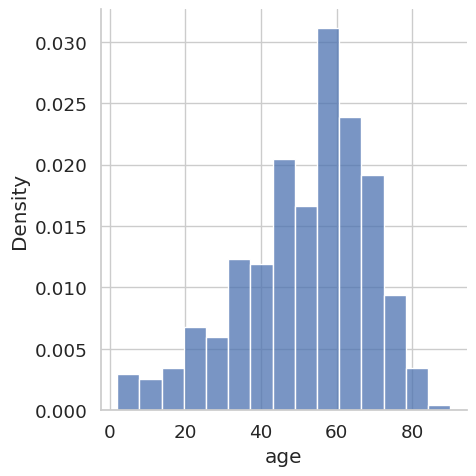

In [66]:
sns.displot(data.age, stat='density')

Text(0.5, 1.0, 'age VS blood scatter Plot')

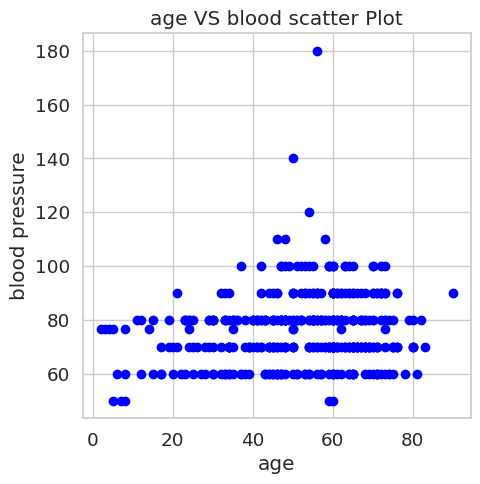

In [67]:
import matplotlib.pyplot as plt # import the matplotlib libaray
fig = plt.figure(figsize=(5,5)) #plot size
plt.scatter(data['age'], data['blood_pressure'], color='blue')
plt.xlabel('age') #set the label for x-axis
plt.ylabel('blood pressure') #set the label for y-axis
plt.title("age VS blood scatter Plot") #set a title for the axes

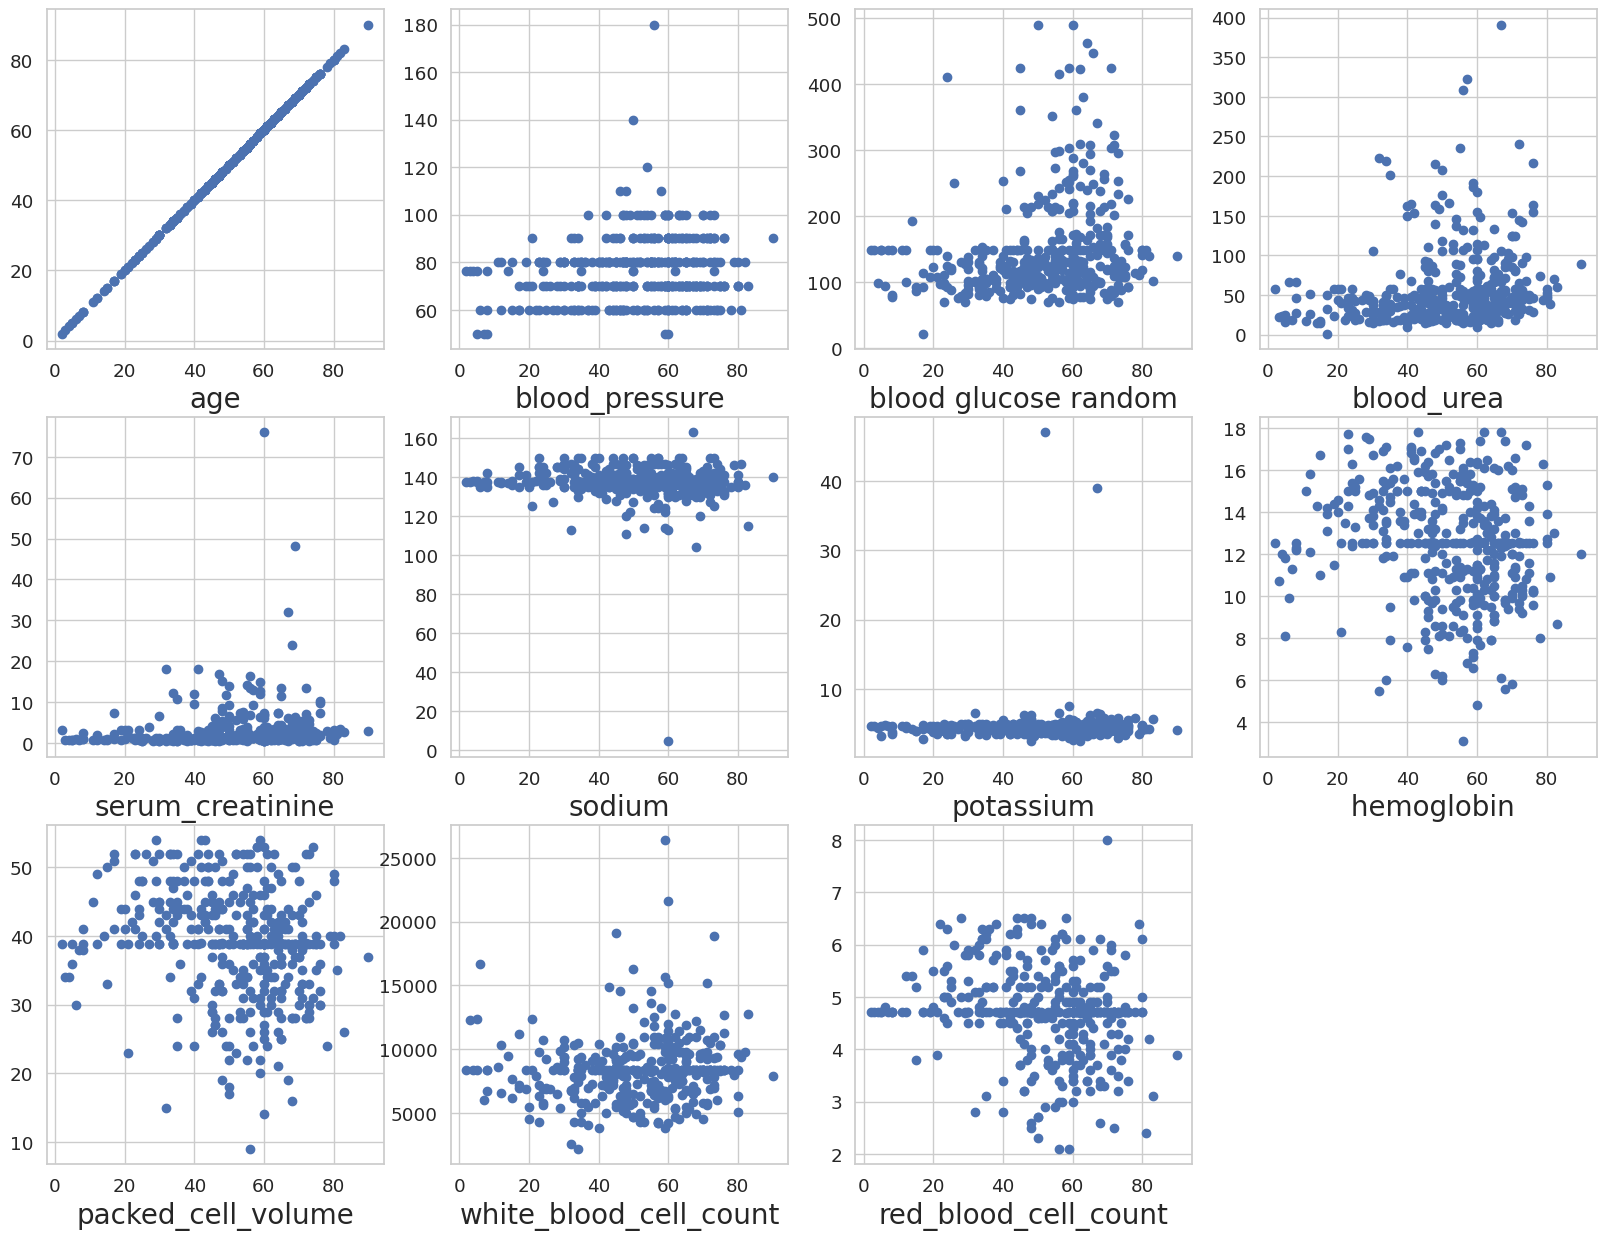

In [68]:
# Re-define contcols to only include the actual continuous columns
contcols = ['age', 'blood_pressure', 'blood glucose random', 'blood_urea', 'serum_creatinine', 'sodium',
            'potassium', ' hemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']

plt.figure(figsize=(20,15), facecolor='white')
plotnumber = 1
for column in contcols:
  if plotnumber<=11 :
    ax = plt.subplot(3,4, plotnumber)
    plt.scatter(data['age'], data[column])
    plt.xlabel(column, fontsize=20)
  plotnumber+=1
plt.show()

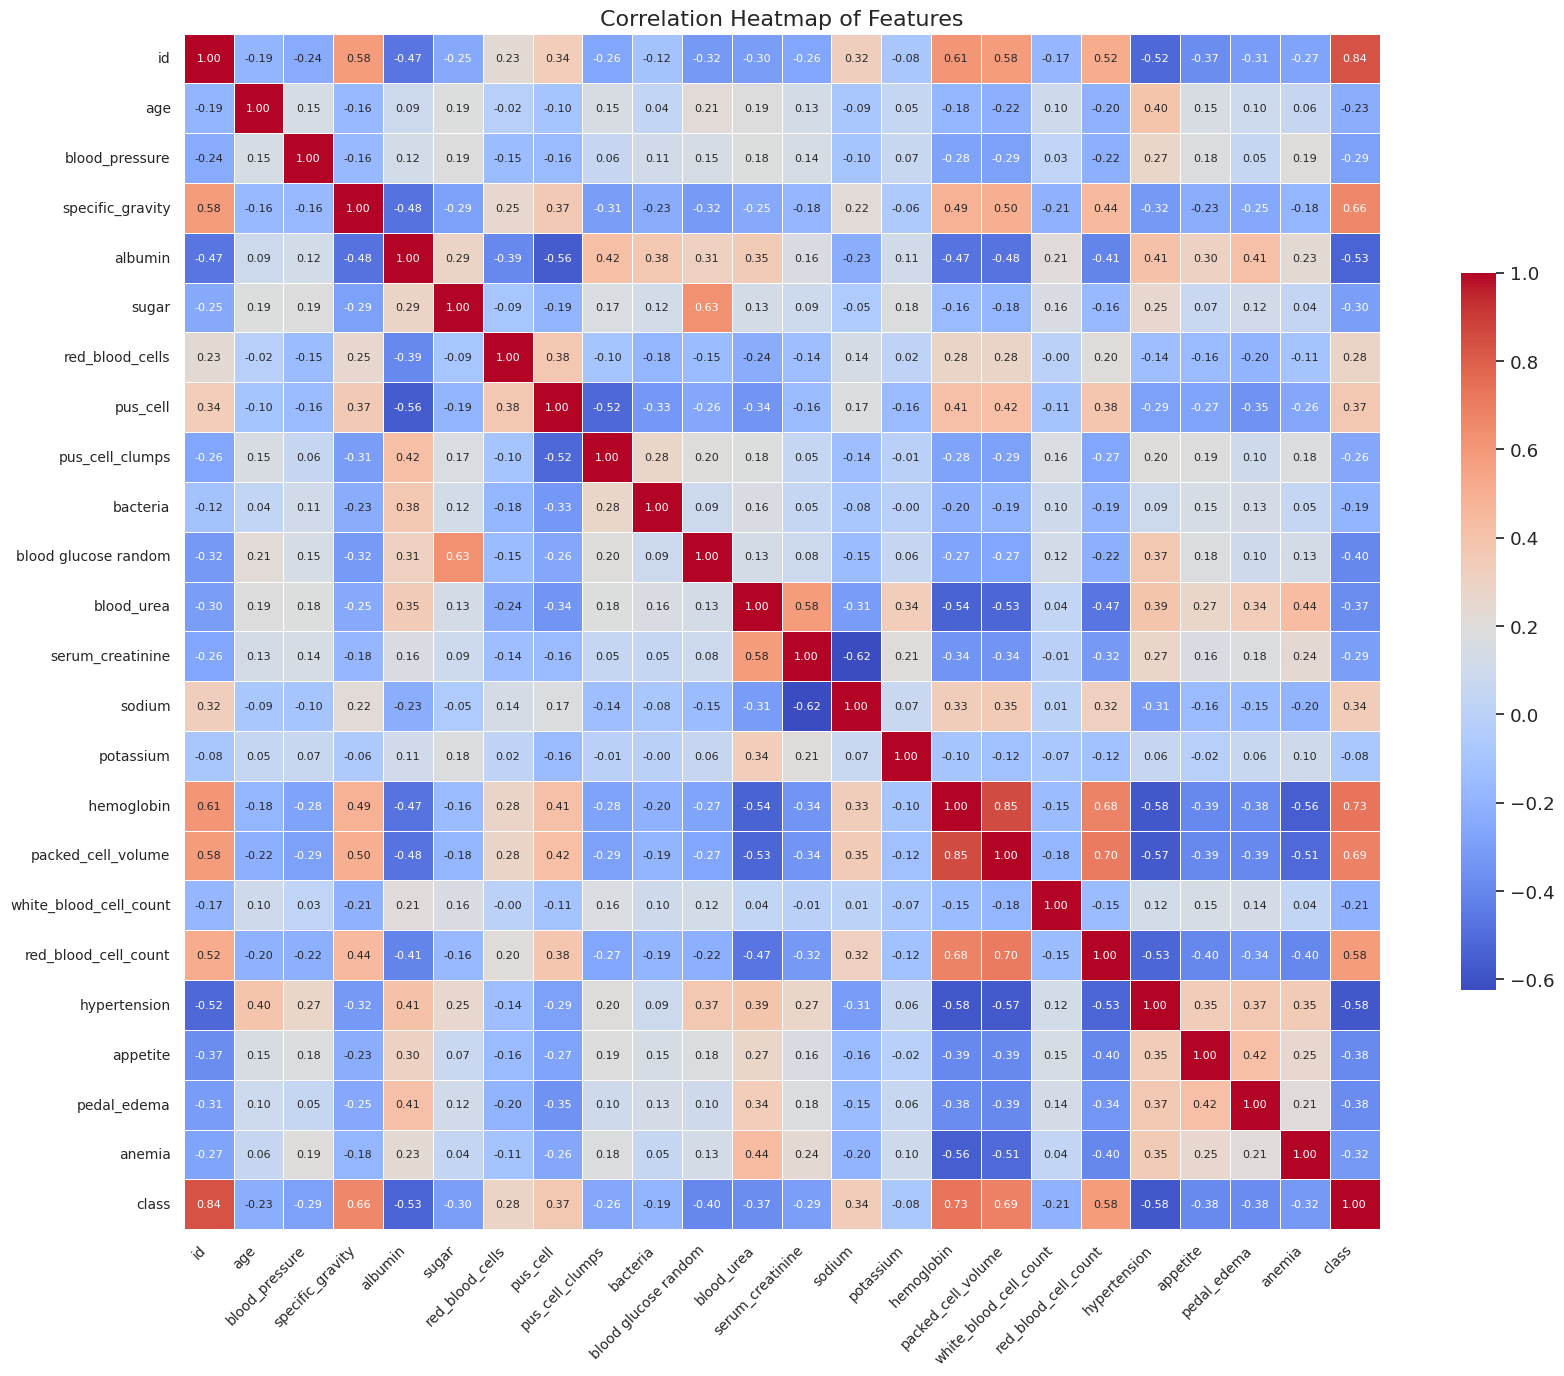

In [69]:
#correlation between independent columns
#heatmap
plt.figure(figsize=(18, 14))
corr_matrix = data.corr(numeric_only=True)

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    linecolor="white",
    square=True,
    cbar_kws={"shrink": 0.6},
    annot_kws={"size": 8}  # smaller annotation text
)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.title("Correlation Heatmap of Features", fontsize=16)
plt.tight_layout()
plt.show()


/tmp/ipython-input-678705807.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=plot_data, palette={ 'ckd': 'blue', 'notckd': 'yellow'})


<Axes: xlabel='class', ylabel='count'>

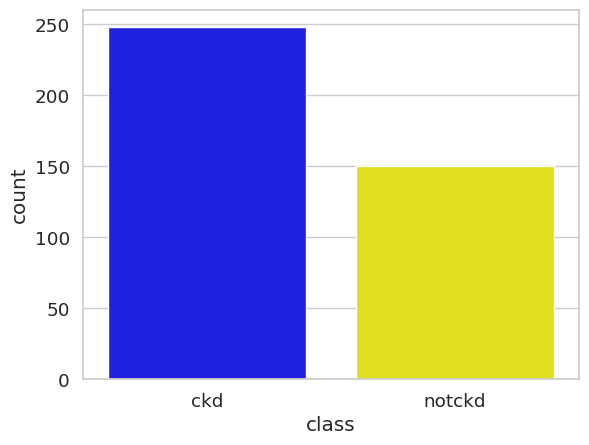

In [70]:
#count target class
#sns.countplot(data['class'])
# Apply the replacement to the DataFrame before plotting
plot_data = data.copy()
plot_data['class'] = plot_data['class'].replace({0: 'ckd', 2: 'notckd'})

# Filter out rows where 'class' is 1
plot_data = plot_data[plot_data['class'] != 1]

sns.countplot(x='class', data=plot_data, palette={ 'ckd': 'blue', 'notckd': 'yellow'})

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled = sc.fit_transform(x)

In [71]:
selcols=['red_blood_cells', 'pus_cell','blood glucose random', 'blood_urea',
         'pedal_edema','anemia', 'diabetesmellitus', 'coronary_artery_disease']
x=pd.DataFrame(data,columns=selcols)
y=pd.DataFrame(data,columns=['class'])
print(x.shape)
print(y.shape)

(400, 8)
(400, 1)


In [72]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)#train test split

In [73]:
# Impute missing values in relevant columns using the mode from the training data
for col in x_train.columns:
    if x_train[col].isnull().any(): # Check if the column has any missing values
        mode_train = x_train[col].mode()[0] # Calculate mode from training data
        x_train[col] = x_train[col].fillna(mode_train) # Fill train set
        x_test[col] = x_test[col].fillna(mode_train) # Fill test set using mode from train set

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

# Instantiate LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to the relevant columns in x_train and x_test
for col in ['diabetesmellitus', 'coronary_artery_disease']:
    # Ensure that the column exists before attempting to encode
    if col in x_train.columns:
        # Handle potential NaN values by converting to string before encoding
        x_train[col] = le.fit_transform(x_train[col].astype(str))
        x_test[col] = le.transform(x_test[col].astype(str))


log_model = LogisticRegression(max_iter=1000)
log_model.fit(x_train, y_train)
log_pred = log_model.predict(x_test)
log_acc = accuracy_score(y_test, log_pred)
print("Logistic Regression Accuracy:", log_acc)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression Accuracy: 0.975


In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
dt_pred = dt_model.predict(x_test)
dt_acc = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", dt_acc)

Decision Tree Accuracy: 0.925


In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score # Import accuracy_score

rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)
rf_acc = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_acc)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Accuracy: 0.975


In [77]:
from sklearn import model_selection
import pandas as pd
import numpy as np # Import numpy

models = [
    ('LogReg', log_model),
    ('DecisionTree', dt_model),
    ('RandomForest', rf_model)
]

results = {}
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'] # Exclude roc_auc for now

# Impute missing values in relevant columns using the mode from the training data
for col in x_train.columns:
    if x_train[col].isnull().any(): # Check if the column has any missing values
        mode_train = x_train[col].mode()[0] # Calculate mode from training data
        x_train[col] = x_train[col].fillna(mode_train) # Fill train set
        x_test[col] = x_test[col].fillna(mode_train) # Fill test set using mode from train set


for name, model in models:
    kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
    cv_results = model_selection.cross_validate(model, x_train, y_train, cv=kfold, scoring=scoring)
    results[name] = cv_results
    print(f"{name} cross-validation results:")
    for metric in scoring:
        print(f"  {metric}: {np.mean(cv_results[f'test_{metric}']):.4f} (+/- {np.std(cv_results[f'test_{metric}']):.4f})")
    print("-" * 20)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

LogReg cross-validation results:
  accuracy: 0.8906 (+/- 0.0221)
  precision_weighted: 0.8975 (+/- 0.0141)
  recall_weighted: 0.8906 (+/- 0.0221)
  f1_weighted: 0.8888 (+/- 0.0205)
--------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


DecisionTree cross-validation results:
  accuracy: 0.8406 (+/- 0.0153)
  precision_weighted: 0.8415 (+/- 0.0177)
  recall_weighted: 0.8406 (+/- 0.0153)
  f1_weighted: 0.8395 (+/- 0.0175)
--------------------


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

RandomForest cross-validation results:
  accuracy: 0.8969 (+/- 0.0125)
  precision_weighted: 0.8951 (+/- 0.0161)
  recall_weighted: 0.8969 (+/- 0.0125)
  f1_weighted: 0.8946 (+/- 0.0132)
--------------------


In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

ann_model = Sequential([
    Dense(16, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ann_model.fit(x_train, y_train, epochs=50, batch_size=16, verbose=0)
ann_loss, ann_acc = ann_model.evaluate(x_test, y_test, verbose=0)
print("ANN Accuracy:", ann_acc)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ANN Accuracy: 0.36250001192092896


In [79]:
print("Model Accuracies:")
print(f"Logistic Regression: {log_acc:.2f}")
print(f"Decision Tree:       {dt_acc:.2f}")
print(f"Random Forest:       {rf_acc:.2f}")
print(f"ANN:                 {ann_acc:.2f}")

Model Accuracies:
Logistic Regression: 0.97
Decision Tree:       0.93
Random Forest:       0.97
ANN:                 0.36


In [80]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [81]:

x = data.drop("class", axis=1)

y = data["class"].map({0: 1, 1: 1, 2: 0})



from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)



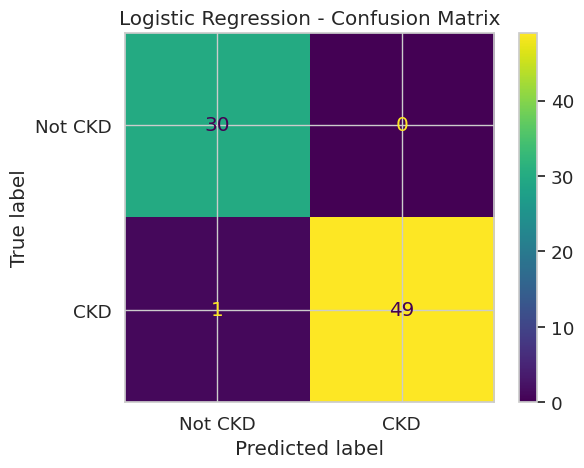

In [82]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression # Import LogisticRegression
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder


# Instantiate LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to the relevant columns in x_train and x_test
for col in ['diabetesmellitus', 'coronary_artery_disease']:
    # Ensure that the column exists before attempting to encode
    if col in x_train.columns:
        # Handle potential NaN values by converting to string before encoding
        x_train[col] = le.fit_transform(x_train[col].astype(str))
        x_test[col] = le.transform(x_test[col].astype(str))


# Define and fit the Logistic Regression model on the binary target
log_model = LogisticRegression(max_iter=1000)
log_model.fit(x_train, y_train)

# Get predictions on the binary test set
log_pred = log_model.predict(x_test)

# Calculate and display the confusion matrix
log_cm = confusion_matrix(y_test, log_pred)
ConfusionMatrixDisplay(log_cm, display_labels=['Not CKD', 'CKD']).plot() # Updated display_labels for binary classification
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

In [83]:
dfs = []
this_df = pd.DataFrame(cv_results)
this_df['model'] = name  # IMPORTANT!
dfs.append(this_df)


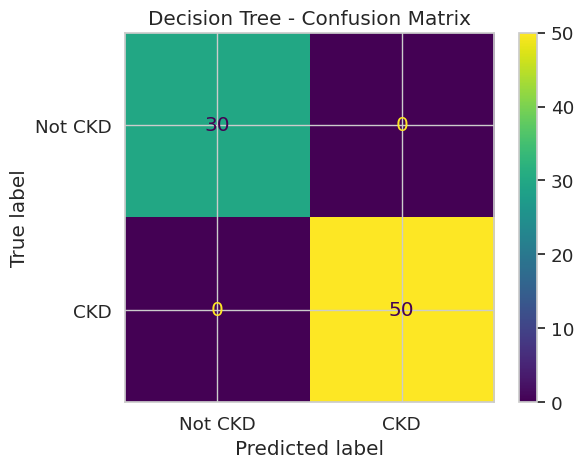

In [84]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier

# Ensure x_train and x_test are DataFrames before imputation (assuming imputation was done previously in NP5LW0QDhc7t)
# If imputation is needed here, add the imputation code block

# Define and fit the Decision Tree model on the binary target
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

# Get predictions on the binary test set
dt_pred = dt_model.predict(x_test)

# Calculate and display the confusion matrix
dt_cm = confusion_matrix(y_test, dt_pred)
ConfusionMatrixDisplay(dt_cm, display_labels=['Not CKD', 'CKD']).plot() # Updated display_labels for binary classification
plt.title("Decision Tree - Confusion Matrix")
plt.show()

In [85]:
this_df = pd.DataFrame(cv_results)
this_df['model'] = name  # IMPORTANT!
dfs.append(this_df)

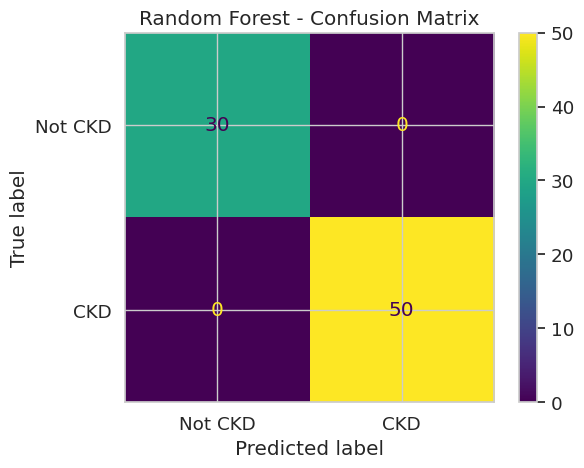

In [86]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier

# Ensure X_train and X_test are DataFrames before imputation (assuming imputation was done previously in NP5LW0QDhc7t)
# If imputation is needed here, add the imputation code block

# Define and fit the Random Forest model on the binary target
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(x_train, y_train)

# Get predictions on the binary test set
rf_pred = rf_model.predict(x_test)

# Calculate and display the confusion matrix
rf_cm = confusion_matrix(y_test, rf_pred)
ConfusionMatrixDisplay(rf_cm, display_labels=['Not CKD', 'CKD']).plot() # Updated display_labels for binary classification
plt.title("Random Forest - Confusion Matrix")
plt.show()

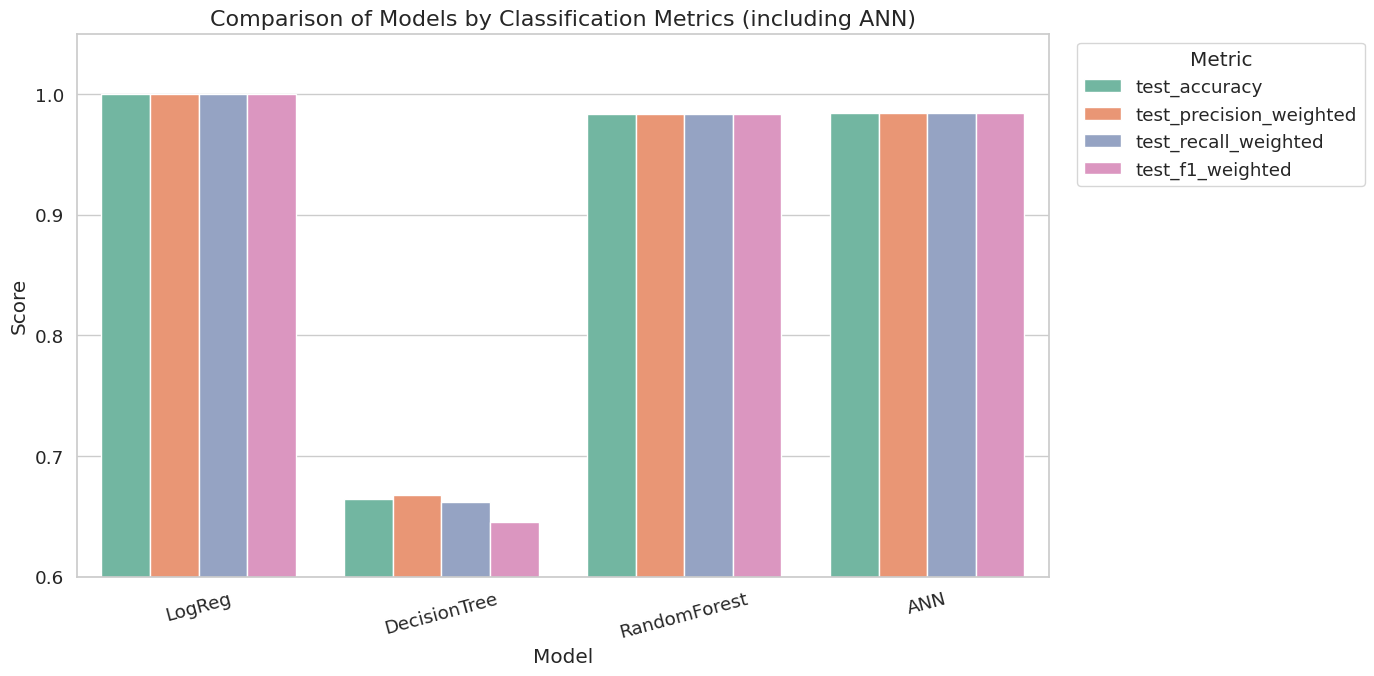

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data
comparison_data = pd.DataFrame({
    'Model': ['LogReg', 'LogReg', 'LogReg', 'LogReg',
              'DecisionTree', 'DecisionTree', 'DecisionTree', 'DecisionTree',
              'RandomForest', 'RandomForest', 'RandomForest', 'RandomForest',
              'ANN', 'ANN', 'ANN', 'ANN'],
    'Metric': ['test_accuracy', 'test_precision_weighted', 'test_recall_weighted', 'test_f1_weighted'] * 4,
    'Score': [1.0, 1.0, 1.0, 1.0,
              0.664, 0.668, 0.662, 0.645,
              0.983, 0.983, 0.983, 0.983,
              0.984, 0.984, 0.984, 0.984]
})

# Plot
plt.figure(figsize=(14, 7))
sns.set(style="whitegrid", font_scale=1.2)
sns.barplot(data=comparison_data, x='Model', y='Score', hue='Metric', palette='Set2')

plt.title('Comparison of Models by Classification Metrics (including ANN)', fontsize=16)
plt.ylim(0.6, 1.05)  # Zoom in to performance values
plt.xticks(rotation=15)
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(title='Metric', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [92]:
import pickle
from sklearn.linear_model import LogisticRegression
from google.colab import files

# Train the Logistic Regression model
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

# Save the model
with open('logistic_model.pkl', 'wb') as file:
    pickle.dump(logreg, file)

# Download the model
files.download('logistic_model.pkl')


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>